# Name: Trishanku Sarma 

# Topic:  KMeans Clustering using Iris Dataset 

# Import the python libraries

In [1]:
import numpy as np;

import pandas as pd;

from sklearn.datasets import load_iris

from matplotlib import pyplot as plt

%matplotlib inline

# Import the dataset model and use the features ::  petal width and length

In [2]:
iris = load_iris()

df = pd.DataFrame( iris.data , columns = iris.feature_names )

df.drop('sepal length (cm)',axis='columns', inplace = True )

df.drop('sepal width (cm)',axis='columns', inplace = True )

X = df['petal length (cm)'] 

Y = df['petal width (cm)']

df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Plot as scatter plot

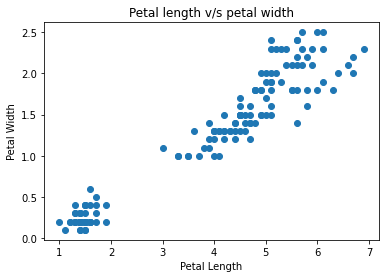

In [3]:
plt.scatter( X , Y )

plt.title('Petal length v/s petal width')

plt.xlabel('Petal Length')

plt.ylabel('Petal Width')

plt.show()

# Fit into the K Means clustering model

In [4]:
from sklearn.cluster import KMeans

km = KMeans( n_clusters = 3 )

y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

df['clusters'] = y_predicted

df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [5]:
df1 = df[df.clusters==0]

df2 = df[df.clusters==1]

df3 = df[df.clusters==2]

# Plot it into a scatter plot to see the clusters 

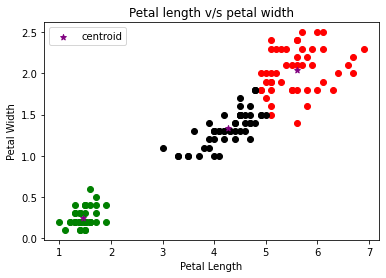

In [6]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')

plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')

plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')

plt.scatter( km.cluster_centers_[:,0] , km.cluster_centers_[:,1] , marker='*' , color='purple' , label = 'centroid' )

plt.title('Petal length v/s petal width')

plt.xlabel('Petal Length')

plt.ylabel('Petal Width')

plt.legend()

# If any ambiquous results arises go for preprocessing

In [7]:
#Since the results are as per expected and the values of the features does not differ much with respect to scalling so scalling 

#the data would also give similar results

# Preprocess the features using Min Max Scaler

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])

df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])

df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

df.head()

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [9]:
from sklearn.cluster import KMeans

km = KMeans( n_clusters = 3 )

y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

df['clusters'] = y_predicted

df.head()

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [10]:
df1 = df[df.clusters==0]

df2 = df[df.clusters==1]

df3 = df[df.clusters==2]

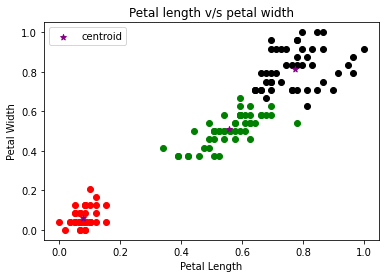

In [11]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')

plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')

plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')

plt.scatter( km.cluster_centers_[:,0] , km.cluster_centers_[:,1] , marker='*' , color='purple' , label = 'centroid' )

plt.title('Petal length v/s petal width')

plt.xlabel('Petal Length')

plt.ylabel('Petal Width')

plt.legend()

# Elbow plot

In [12]:
sse = []
k_rng = range(1,10);

for i in k_rng:
    
    km = KMeans(n_clusters=i)
    
    km.fit(df[['petal length (cm)','petal width (cm)']])
    
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of squared errors')

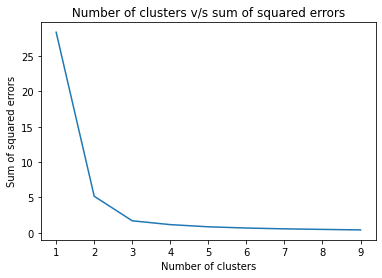

In [14]:
plt.plot( k_rng , sse )

plt.title(' Number of clusters v/s sum of squared errors ')

plt.xlabel('Number of clusters')

plt.ylabel('Sum of squared errors')

# In this stage, we can use the entire model again but with 4 features now indeed

In [18]:
df = pd.DataFrame( iris.data , columns = iris.feature_names )

X = df.iloc[ : , [0,1,2,3]].values

In [21]:
from sklearn.cluster import KMeans

km = KMeans( n_clusters=3 )

y_predicted = km.fit_predict(X)

df['clusters'] = y_predicted

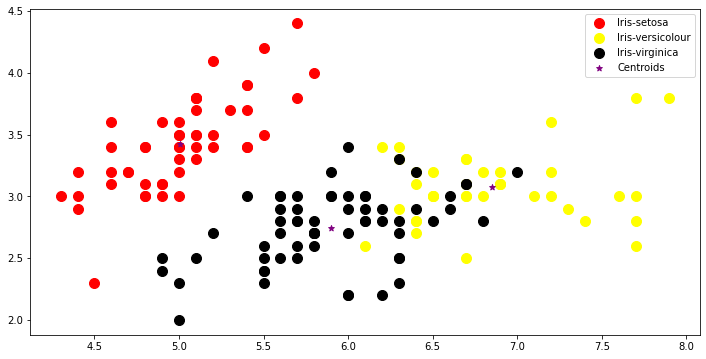

In [30]:
plt.figure(figsize=(12,6))

df1 = df[df.clusters==0]

df2 = df[df.clusters==1]

df3 = df[df.clusters==2]

plt.scatter( df1['sepal length (cm)'] , df1['sepal width (cm)'] , s=100, color = 'red', label = 'Iris-setosa')

plt.scatter( df2['sepal length (cm)'] , df2['sepal width (cm)'] , s=100, color = 'yellow', label = 'Iris-versicolour')

plt.scatter( df3['sepal length (cm)'] , df3['sepal width (cm)'] , s=100, color = 'black', label = 'Iris-virginica')

plt.scatter( km.cluster_centers_[ : , 0 ] , km.cluster_centers_[ : , 1 ] , marker='*' , color='purple' , label = 'Centroids' )

plt.legend()